In [9]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names


In [10]:
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Without PCA
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
acc_without_pca = accuracy_score(y_test, y_pred)

# With PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
acc_with_pca = accuracy_score(y_test, y_pred_pca)

print("Number of Components:", pca.n_components_)
print("Explained Variance:", pca.explained_variance_ratio_)
print("Accuracy without PCA:", acc_without_pca)
print("Accuracy with PCA:", acc_with_pca)


Number of Components: 1
Explained Variance: [0.4316748]
Accuracy without PCA: 0.9824561403508771
Accuracy with PCA: 0.9239766081871345


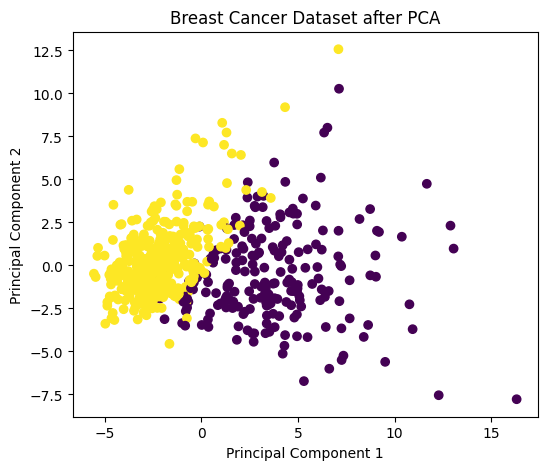

In [13]:

# Standardize before PCA
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca_vis = PCA(n_components=2)
X_pca_vis = pca_vis.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Breast Cancer Dataset after PCA")
plt.show()


